In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 
#plt.style.use(['science', 'notebook', 'grid'])

# Tight Binding Model (1-D Lattice)

For a 1D chain of atoms, we can write the time independent schrodinger's function as: $$E\psi_{n}=t\psi_{n-1}+\epsilon \psi_{n}+t\psi_{n+{1}}$$
Where:

- $ϵ$ is the on-site energy,
    
- $t$ is the hopping (overlap) term,
    
- $\psi_n$​ is the wavefunction amplitude at site nnn.
    

In Python, we’ll build the **Hamiltonian matrix** $H$, then solve: 
$$H\vec{\psi}=E\vec{\psi}$$

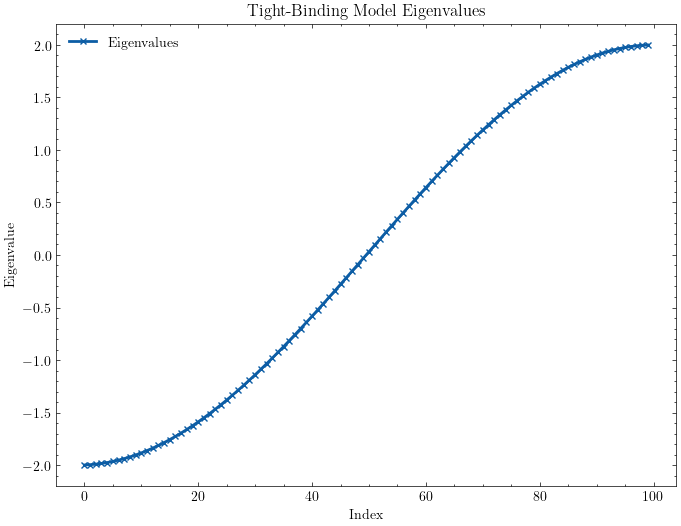

In [4]:
# Parameters
N=100
t=-1.0
a=1
epsilon=0.0

# Build the Hamiltonian matrix
main_diag = np.zeros(N)*epsilon
sub_diag = np.ones(N-1)*t
H = np.diag(main_diag) + np.diag(sub_diag, k=1) + np.diag(sub_diag, k=-1)

# Solve the eigenvalue problem
eigvals, eigenvectors = np.linalg.eigh(H)
# Plot the eigenvalues
plt.style.use('science')
plt.figure(figsize=(8, 6))
plt.plot(eigvals, 'x-', lw=2, ms=4, label='Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Tight-Binding Model Eigenvalues')
plt.legend()
plt.show()

### **Bloch’s Theorem: Wavefunction in a Periodic Potential**

Bloch’s theorem says:

> In a periodic potential, solutions to the Schrödinger equation are **plane waves modulated by a periodic function** 

In our 1D lattice:
$$\psi_{n}=\psi_{0}e^{ikna}$$
Where:
- $n$: lattice site index
    
- $a$: lattice spacing
    
- $k$: crystal momentum (quantized due to periodic boundary condition)

### **Plug Bloch Wave into the Tight-Binding Equation**

Substitute into the tight-binding form:
$$E\psi_{n}=t\psi_{n-1}+\epsilon \psi_{n}+t\psi_{n+{1}}$$
Hence now we can write: 

- $\psi_{n+1}=\psi_{n}e^{ika}$
- $\psi_{n-1}=\psi_{n}e^{-ika}$

Substituting it all back: $$E\psi_{n}=\epsilon \psi_{n}+t\psi_{n}e^{ika}+t\psi_{n}e^{-ika}$$
Or $$\boxed{E\psi_{n}=\epsilon+2t\cos(ka)}$$
### **Quantization of $k$: Periodic Boundary Conditions (PBC)**

We assume the **ends of the chain are connected** (like a ring):
$$\psi_{0}=\psi_{N}$$
Substituting Bloch wave:
$$\psi_{N}=e^{ikNa}\psi_{0}=\psi_{0}$$
Or we get the condition: $$e^{ikNa}=1$$
So allowed $k$ values are: $$k=\frac{2\pi}{Na}\cdot \nu~~,~~\nu \in \mathbb{Z}$$
For $N$ atoms, we get $N$ discrete $k$ values in **first Brillouin Zone**
$$k\in\left[ -\frac{\pi}{a}, \frac{\pi}{a} \right]$$
### **Each $k$ Gives One Energy Level**

So with $N=100$, you get **$100$ allowed kkk** values, and thus **100 eigenvalues**:

- They form a **continuous band** from:
$$E_{min}=\epsilon-2|t|~~\mathrm{to}~~E_{max}=\epsilon+2|t|$$
Each eigenvalue corresponds to an **extended Bloch wave** $\psi_{n}=e^{ikna}$, i.e., a wave like electron spanning the crystal.



In [5]:
n_vals=np.arange(-N//2, N//2)
k_vals=(2*np.pi/(N*a))*n_vals
k_vals_sorted=np.sort(k_vals)

E_k_analytical = epsilon+2 * t * np.cos(k_vals_sorted * a)



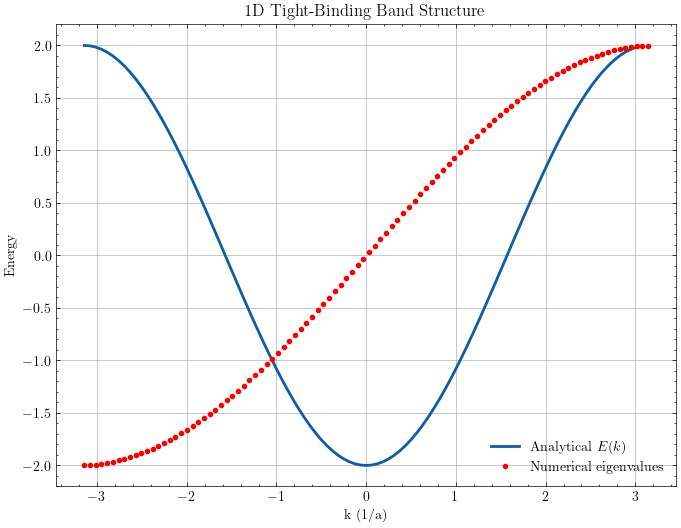

In [6]:
plt.style.use('science')
plt.figure(figsize=(8,6))
plt.plot(k_vals_sorted, E_k_analytical, label="Analytical $E(k)$", lw=2)
plt.plot(np.linspace(-np.pi/a, np.pi/a, N), eigvals, 'r.', label="Numerical eigenvalues")


plt.xlabel("k (1/a)")
plt.ylabel("Energy")
plt.title("1D Tight-Binding Band Structure")
plt.grid(True)
plt.legend()
plt.show()

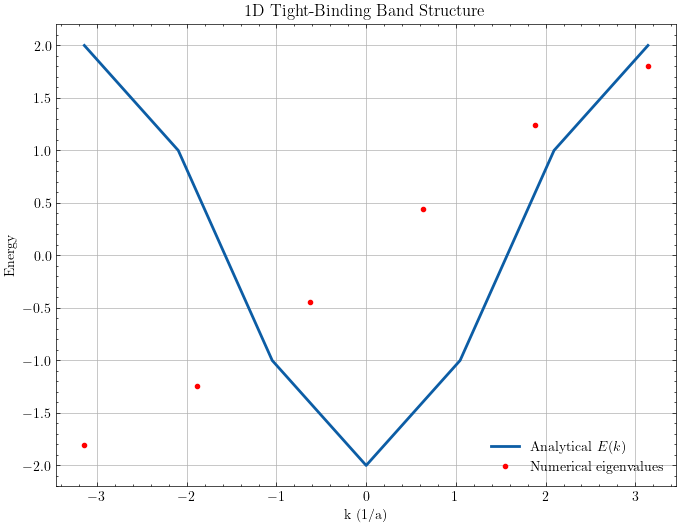

In [7]:
## Case of Benzene Ring, with N=6
# Parameters
N=6
a=1
t=-1.0
epsilon=0.0

# Build the Hamiltonian matrix
main_diag = np.zeros(N)*epsilon
sub_diag = np.ones(N-1)*t
H = np.diag(main_diag) + np.diag(sub_diag, k=1) + np.diag(sub_diag, k=-1)

# Solve the eigenvalue problem
eigvals, eigenvectors = np.linalg.eigh(H)

n_vals=np.arange(-N//2, N//2+1)
k_vals=(2*np.pi/(N*a))*n_vals
k_vals_sorted=np.sort(k_vals)

E_k_analytical = epsilon+2 * t * np.cos(k_vals_sorted * a)

plt.style.use('science')
plt.figure(figsize=(8,6))
plt.plot(k_vals_sorted, E_k_analytical, label="Analytical $E(k)$", lw=2)
plt.plot(np.linspace(-np.pi/a, np.pi/a, N), eigvals, 'r.', label="Numerical eigenvalues")

plt.xlabel("k (1/a)")
plt.ylabel("Energy")
plt.title("1D Tight-Binding Band Structure")
plt.grid(True)
plt.legend()
plt.show()


# Schrödinger Equation (Tight-Binding in 2D)

The discrete tight-binding Schrödinger equation becomes:
$$E\psi_{m,n}=\epsilon \psi_{m,n}+t_{x}(\psi_{m+1,n}+\psi_{m-1,n})+t_{y}(\psi_{m,n+1}+\psi_{m,n-1})$$
- $ϵ$: on-site energy
    
- $t_x,t_{y}$​: hopping energy in x and y
We can effectively take them equal for simplicity

### Bloch’s Theorem in 2D

Bloch’s theorem extends to 2D:
$$\psi_{m,n}=\psi_{0}e^{i(k_{x}ma+k_{y}na)}=\psi_{0}e^{i\vec{k}\cdot \vec{r}_{m,n}}$$
Substituting, we can get the dispersion energy relation for the 2D lattice:
$$E=\epsilon+2t_{x}\cos(k_{x}a)+2t_{y}\cos(k_{y}a)$$
If $t_{x}=t_{y}=t$ then,
$$E=\epsilon+2t(\cos k_{x}a+\cos k_{y}a)$$


In [8]:
# Parameters
num_k=200
a = 1.0         # Lattice constant
t = -1.0        # Hopping energy
epsilon = 0.0   # On-site energy


num_k = 200
kx = np.linspace(-np.pi/a, np.pi/a, num_k)
ky = np.linspace(-np.pi/a, np.pi/a, num_k)
KX, KY = np.meshgrid(kx, ky)

# Energy function
E_k = epsilon + 2 * t * (np.cos(KX * a) + np.cos(KY * a))

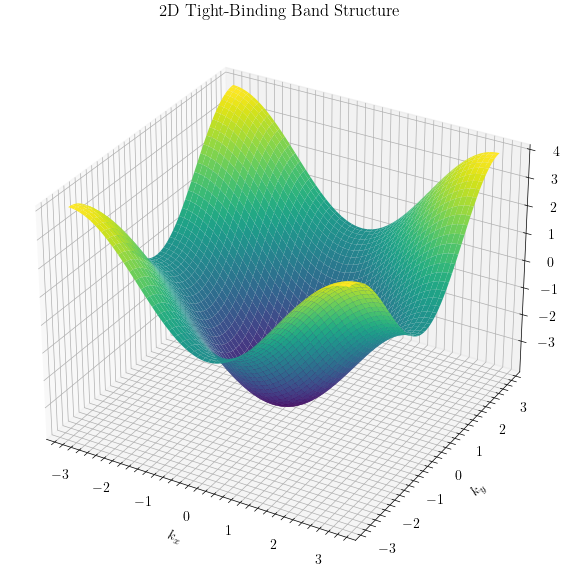

In [9]:
# Plot
plt.style.use('science')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX, KY, E_k, cmap='viridis')

ax.set_title('2D Tight-Binding Band Structure')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy $E(k_x, k_y)$')
plt.tight_layout()
plt.show()

# Tight-Binding Hamiltonian with Basis

For each unit cell, $n$, we define a 2 - component wavefunction

$$\psi_{n}=\begin{bmatrix}
\psi_{n}^A \\
\psi_{n}^B
\end{bmatrix}$$
The tight binding Schrodinger equation becomes: $$E\mathbf{\Psi_{n}}=H_{0}\mathbf{\Psi_{n}}+H_{1}\Psi_{n+1}H_{1}^{\dagger}\mathbf{\Psi_{n-1}}$$
- $H_{0}$​ is the **on-site Hamiltonian** within the same unit cell (includes ϵ\epsilonϵ, intra-cell hopping)
    
- $H_1$​ is the **coupling to next unit cell**
    
- $H_1^\dagger$​ is the **coupling to previous unit cell**

### Example: 1D Chain with Two-Atom Basis (e.g. XOXOXO)

Let’s say:

- On-site energy for A and B is ϵ\epsilonϵ
    
- Hopping within a unit cell (A to B) is $t$
    
- Hopping from B of one unit cell to A of next cell is $t′$
    

Then the Bloch Hamiltonian becomes:
$$H(k)=\begin{bmatrix}
\epsilon & t+t'e^{-ika} \\
t+t'e^{ika} & \epsilon
\end{bmatrix}$$
The eigenvalues are:

The eigenvalues are:
$$E(k)=\epsilon\pm \lvert t+t'e^{ika} \rvert=\epsilon\pm \sqrt{ t^2+t'^2+2tt'\cos (ka) } $$
You now get **two bands** instead of one:

- Bonding: $ϵ−|h(k)|$
    
- Anti-bonding: $∣\epsilon + |h(k)|$


In [10]:
# Parameters
a = 1.0         # lattice spacing
t = -2.0        # intra-cell hopping
tp = -2.0       # inter-cell hopping
epsilon = 0   # on-site energy

# k-space
N_k = 200
k_vals = np.linspace(-np.pi/a, np.pi/a, N_k)
E_plus = []
E_minus = []

for k in k_vals:
    h0 = t + tp * np.exp(-1j * k * a)
    H_k = np.array([[epsilon, h0],
                    [np.conj(h0), epsilon]])
    eigvals = np.linalg.eigvalsh(H_k)
    E_minus.append(eigvals[0])
    E_plus.append(eigvals[1])




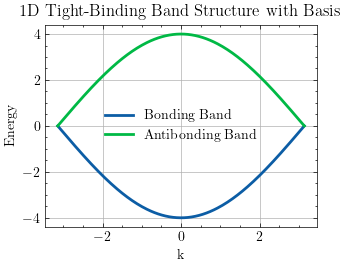

In [11]:
# Plot
plt.plot(k_vals, E_minus, label='Bonding Band', lw=2)
plt.plot(k_vals, E_plus, label='Antibonding Band', lw=2)
plt.xlabel("k")
plt.ylabel("Energy")
plt.title("1D Tight-Binding Band Structure with Basis")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
a = 1.0      # lattice constant (set to 1 for simplicity)
t = -1.0     # hopping energy between A and B sublattices
b1 = 2 * np.pi * np.array([1/3,  1/np.sqrt(3)])
b2 = 2 * np.pi * np.array([1/3, -1/np.sqrt(3)])
Gamma = np.array([0, 0])
K = (2*b1 + b2) / 3
M = (b1 + b2) / 2
def interpolate(p1, p2, N):
    return np.linspace(p1, p2, N)

# Define the full k-path
k_path = np.vstack([
    interpolate(Gamma, K, 100),
    interpolate(K, M, 100),
    interpolate(M, Gamma, 100)
])
E_plus = []
E_minus = []

for k in k_path:
    # Nearest neighbor vectors (from A to 3 B atoms)
    delta1 = a * np.array([0, 1])
    delta2 = a * np.array([-np.sqrt(3)/2, -0.5])
    delta3 = a * np.array([ np.sqrt(3)/2, -0.5])

    # Compute the hopping term h(k)
    h_k = -t * (
        np.exp(1j * np.dot(k, delta1)) +
        np.exp(1j * np.dot(k, delta2)) +
        np.exp(1j * np.dot(k, delta3))
    )

    # Construct the 2x2 Hamiltonian
    H_k = np.array([[0, h_k], [np.conj(h_k), 0]])

    # Diagonalize to get eigenvalues
    eigvals = np.linalg.eigvalsh(H_k)  # Always returns sorted eigenvalues
    E_minus.append(eigvals[0])
    E_plus.append(eigvals[1])


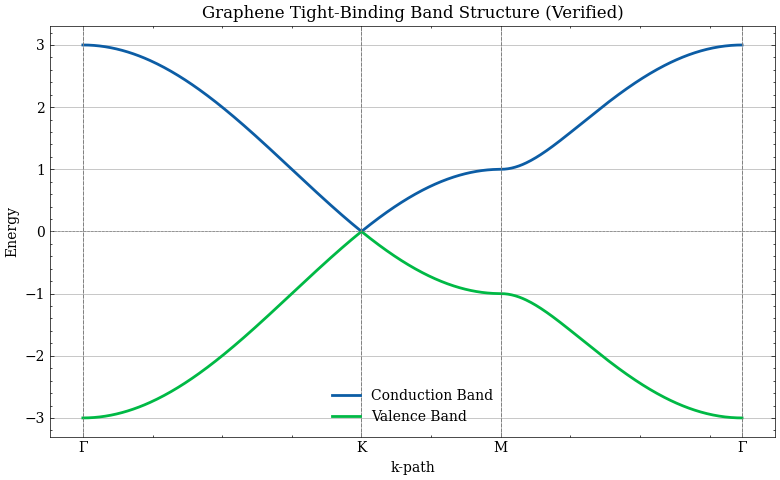

Energy at K-point: -4.440892098500626e-16 4.440892098500626e-16


In [29]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

# -----------------------
# 1. Lattice parameters
# -----------------------
a = 1.0       # nearest-neighbor bond length
t = -1.0      # hopping energy

# -----------------------
# 2. Real-space lattice vectors (graphene)
# -----------------------
a1 = a * np.array([1.0, 0.0])
a2 = a * np.array([0.5, np.sqrt(3)/2])


# Reciprocal lattice vectors
A = np.array([a1, a2]).T
B = 2 * np.pi * np.linalg.inv(A).T
b1, b2 = B[:, 0], B[:, 1]

# -----------------------
# 3. High-symmetry points
# -----------------------
Gamma = np.array([0.0, 0.0])
K = (2 * b1 + b2) / 3
M = (b1 + b2) / 2

# -----------------------
# 4. Interpolate k-path: Γ → K → M → Γ
# -----------------------
def interpolate(p1, p2, N):
    return np.linspace(p1, p2, N)

N = 200
k_segments = [
    interpolate(Gamma, K, N),
    interpolate(K, M, N),
    interpolate(M, Gamma, N)
]
k_path = np.vstack(k_segments)

# Compute cumulative path length (Lambda)
diffs = np.diff(k_path, axis=0)
dk = np.linalg.norm(diffs, axis=1)
Lambda = np.zeros(len(k_path))
Lambda[1:] = np.cumsum(dk)

# -----------------------
# 5. Nearest-neighbor vectors (A to 3 B atoms)
# These are the actual graphene delta vectors
# -----------------------
delta1 = a * np.array([0, 1 / np.sqrt(3)])
delta2 = a * np.array([-0.5, -1 / (2 * np.sqrt(3))])
delta3 = a * np.array([0.5, -1 / (2 * np.sqrt(3))])
deltas = [delta1, delta2, delta3]

# -----------------------
# 6. Compute band energies E(k)
# -----------------------
E_plus, E_minus = [], []
for k in k_path:
    h_k = -t * sum(np.exp(1j * np.dot(k, d)) for d in deltas)
    H_k = np.array([[0, h_k], [np.conj(h_k), 0]])
    eigvals = np.linalg.eigvalsh(H_k)
    E_minus.append(eigvals[0])
    E_plus.append(eigvals[1])

# -----------------------
# 7. Plot the band structure
# -----------------------
plt.figure(figsize=(8, 5))
plt.plot(Lambda, E_plus, label='Conduction Band', lw=2)
plt.plot(Lambda, E_minus, label='Valence Band', lw=2)

# Mark Γ, K, M
tick_positions = [0, N, 2 * N, 3 * N - 1]
plt.xticks([Lambda[i] for i in tick_positions], ['Γ', 'K', 'M', 'Γ'])
for i in tick_positions:
    plt.axvline(Lambda[i], color='gray', linestyle='--', lw=0.7)

plt.xlabel("k-path")
plt.ylabel("Energy")
plt.title("Graphene Tight-Binding Band Structure (Verified)")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: check if they touch at K
print("Energy at K-point:", E_minus[N], E_plus[N])


In [14]:
k_index_K = 99  # Assuming 100 points per path segment
print("Energy at K-point (valence, conduction):", E_minus[k_index_K], E_plus[k_index_K])


Energy at K-point (valence, conduction): -1.2096190128450424 1.2096190128450424
